In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = 'https://drive.google.com/file/d/1oXrF8KHsElHXI_u-BGuijMe4F83U7dvj/view?usp=drive_link'
url = 'https://drive.google.com/uc?id='+url.split('/')[-2]
df = pd.read_csv(url)

In [6]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<h3><mark>Visualizing Data</mark></h3>

<Axes: xlabel='Gene One', ylabel='Gene Two'>

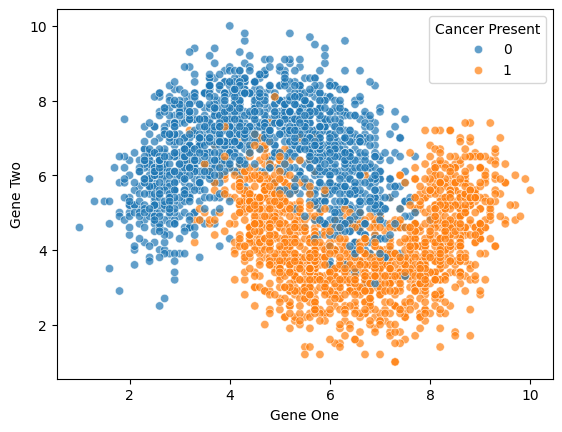

In [7]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7)

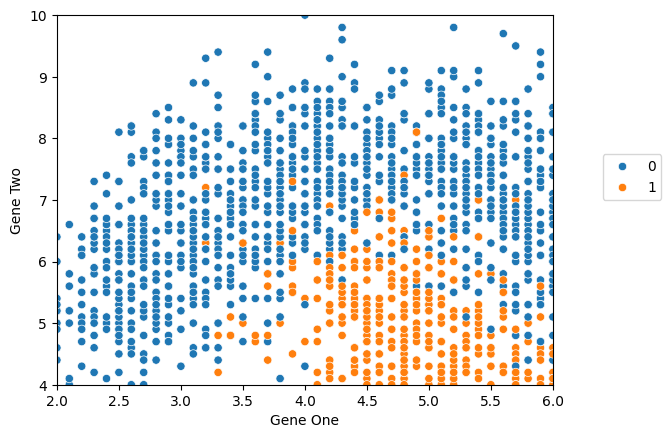

In [9]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df)
plt.xlim(2,6)
plt.ylim(4,10)
plt.legend(loc=(1.1,0.5))

## Train|Test Split and Scaling Data

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

<h3><mark>KNN</mark></h3>

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
y_pred = knn_model.predict(scaled_X_test)

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report

In [30]:
confusion_matrix(y_test,y_pred)

array([[382,  41],
       [ 34, 443]], dtype=int64)

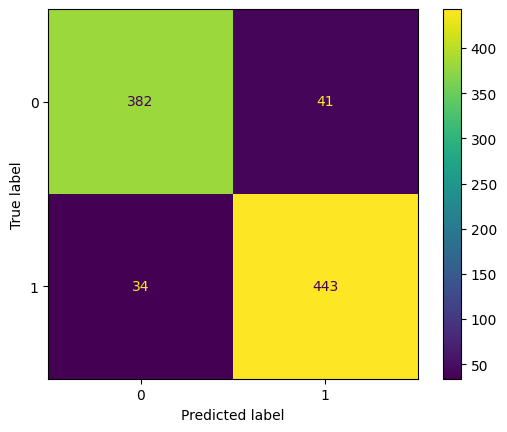

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       423
           1       0.92      0.93      0.92       477

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900

